# Example notebook : analyse binary classification performance

## Load packages

In [1]:
from transparentai.datasets import load_adult
from transparentai.models import ClassificationModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from transparentai.utils import encode_categorical_vars
import pickle

## Load adult dataset

In [2]:
adult = load_adult()

## Prepare and train the model

In [3]:
target = 'income'
target_value = {'>50K':1, '<=50K':0}
adult[target] = adult[target].replace(target_value)

In [4]:
adult, _ = encode_categorical_vars(adult)
X, y = adult.drop(columns=target), adult[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Save for future notebooks

In [6]:
with open('save/model_binary_classification.pkl', mode='wb') as file:
    pickle.dump(clf,file)
file.close()

## Use ClassificationModel class

In [7]:
model = ClassificationModel(model=clf)
model.compute_scores(X=X_test, y=y_test)

### Overall model performance

,accuracy,f1,precision,recall,roc_auc
score,0.864747,0.861242,0.860028,0.864747,{0: 0.9102942712840321}


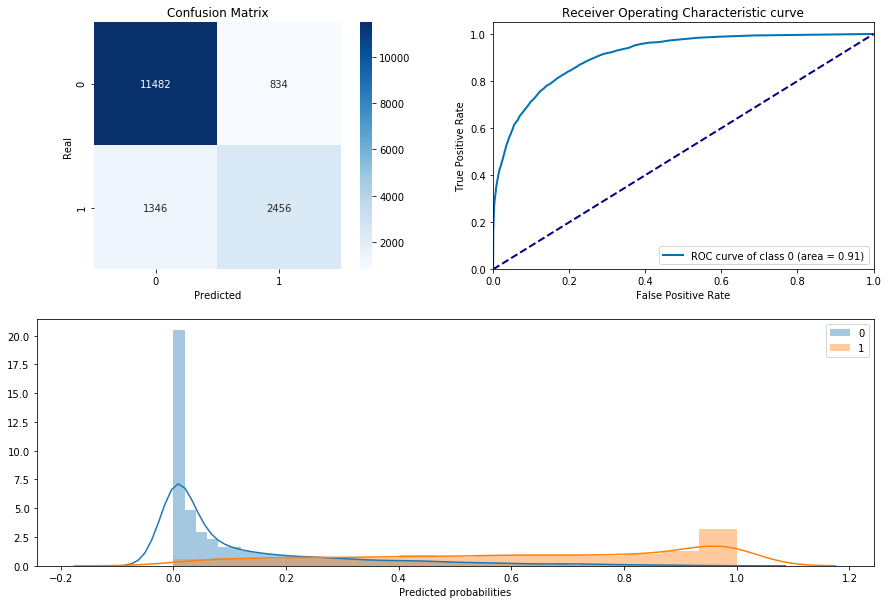

In [8]:
model.plot_scores()

## Save performance metrics

In [9]:
model.scores_to_json()

{'accuracy': 0.8647474872813005,
 'f1': 0.8612423297800639,
 'precision': 0.8600280938340349,
 'recall': 0.8647474872813005,
 'roc_auc': {0: 0.9102942712840321}}

In [10]:
model.save_scores(fname='save/adult_model_performance.json')

## Compare probability threshold

## Proba threshold comparison for accuracy, f1 score, precision & recall

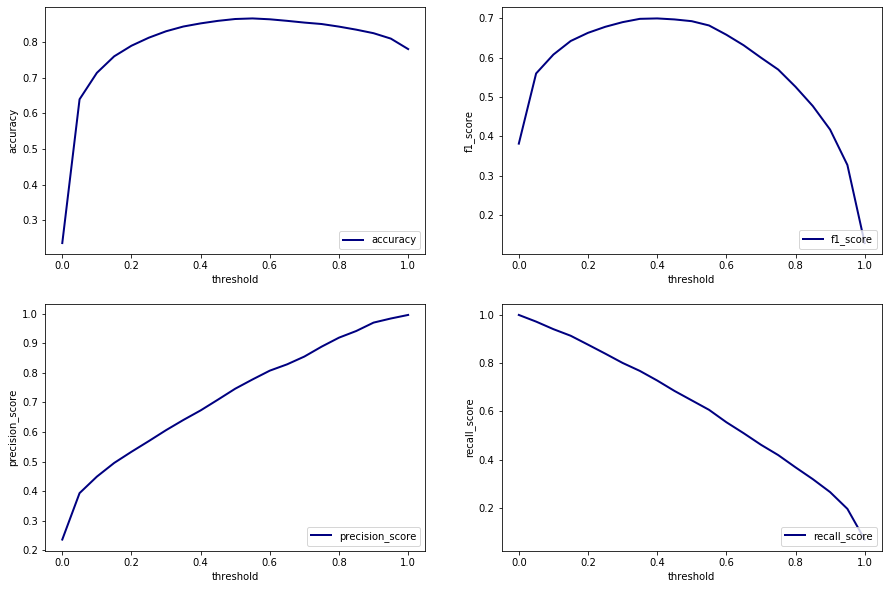

In [11]:
model.plot_threshold()

## Change prediction threshold and show new performance

In [12]:
model.compute_scores(X=X_test, y=y_test, threshold=0.1)

### Overall model performance

,accuracy,f1,precision,recall,roc_auc
score,0.713612,0.735146,0.849005,0.713612,{0: 0.9102942712840321}


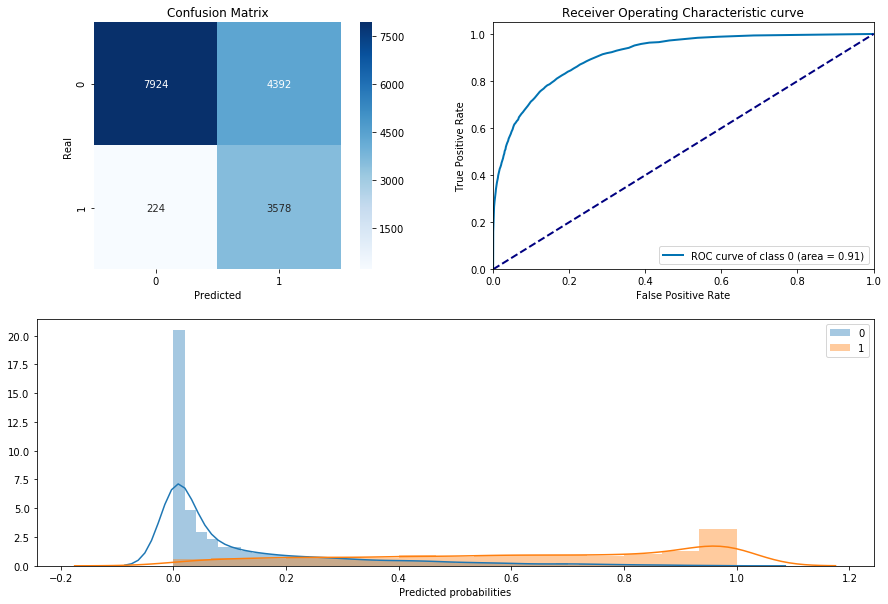

In [13]:
model.plot_scores()

## The end.